In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans

from sklearn.datasets import make_swiss_roll, make_circles, make_blobs

import plotly.express as px

from spectral_clustering import *

In [2]:
# Set random seed
random_state = 1
np.random.seed(random_state)

Generate a simple example as in the paper

In [3]:
n_samples_total = 200
means = [2, 4, 6, 8]
std_dev = 0.1
n_components = len(means)

n_samples_per_component = n_samples_total // n_components

all_samples = []
for mean in means:
    samples = np.random.normal(
        loc=mean,
        scale=std_dev,
        size=n_samples_per_component,
    )
    all_samples.extend(samples)

random_sample = np.array(all_samples)
np.random.shuffle(random_sample)
random_sample = random_sample.reshape(-1, 1)

# Example from the Paper

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


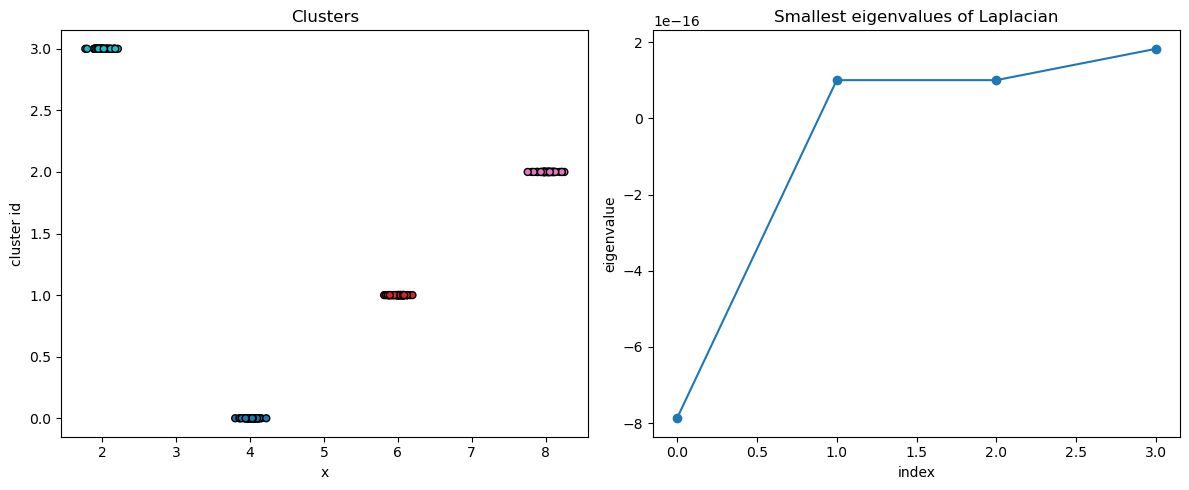

In [4]:
distance_matrix = get_distance_matrix_from_data(random_sample)
similarity_matrix = get_similarity_matrix_from_distance_matrix(
    distance_matrix, sim_graph_type="knn", knn=10
)

unnormalized_res, eigenvectors, eigenvalues = Spectral_Clustering(
    similarity_matrix, K=4, normalized=1, random_state=random_state
)

x = random_sample.flatten() if hasattr(random_sample, "flatten") else random_sample
plt.figure(figsize=(12, 5))
# Left: clusters
plt.subplot(1, 2, 1)
plt.scatter(
    x,
    unnormalized_res.labels_,
    c=unnormalized_res.labels_,
    cmap="tab10",
    s=25,
    edgecolors="k",
)
plt.title("Clusters")
plt.xlabel("x")
plt.ylabel("cluster id")

# Right: smallest eigenvalues of the Laplacian (sorted)
plt.subplot(1, 2, 2)
eig_sorted = np.sort(np.real(eigenvalues))
m = min(len(eig_sorted), 50)
plt.plot(range(m), eig_sorted[:m], marker="o")
plt.title("Smallest eigenvalues of Laplacian")
plt.xlabel("index")
plt.ylabel("eigenvalue")
plt.tight_layout()
plt.show()

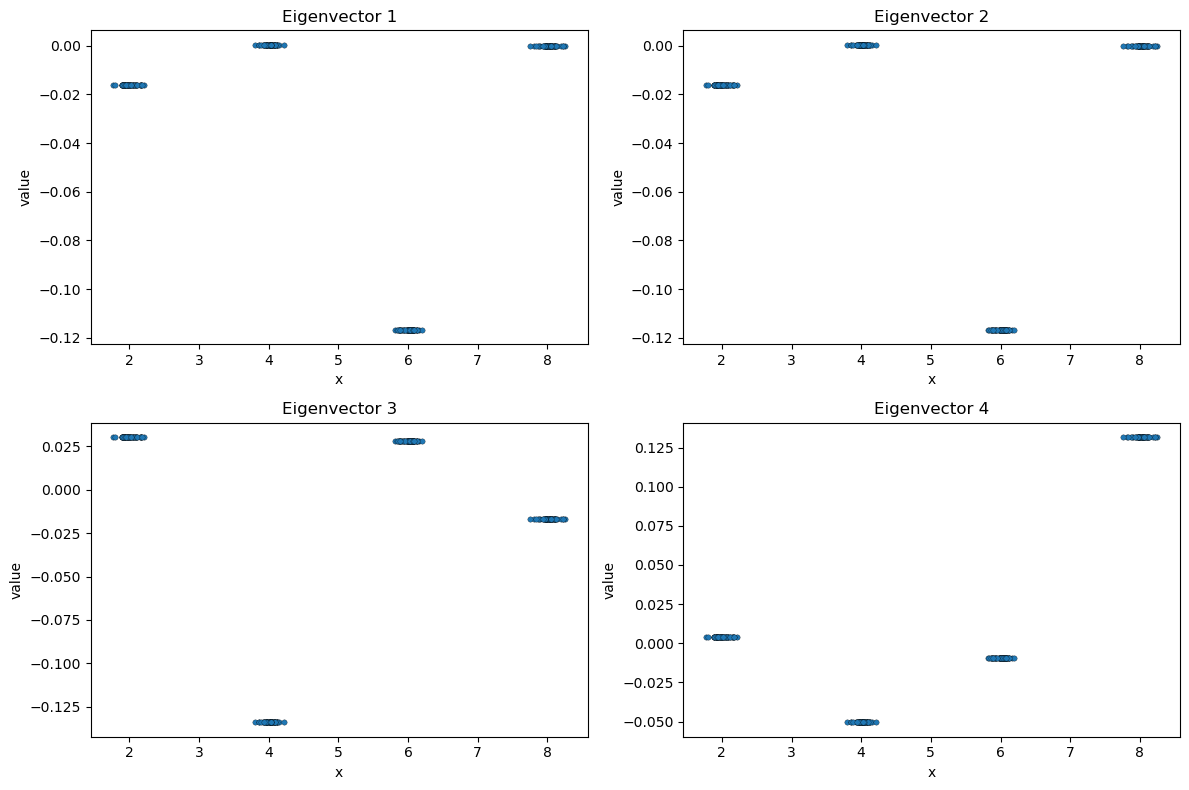

In [5]:
plt.close("all")
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()
x = random_sample.flatten() if hasattr(random_sample, "flatten") else random_sample
# Ensure we have at least 4 eigenvectors available
n_plots = min(4, eigenvectors.shape[1])
for i in range(n_plots):
    axs[i].scatter(x, eigenvectors[:, i], s=15, edgecolors="k", linewidths=0.2)
    axs[i].set_title(f"Eigenvector {i+1}")
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("value")
# If fewer than 4 eigenvectors, hide remaining axes
for j in range(n_plots, 4):
    axs[j].set_visible(False)
plt.tight_layout()
plt.show()

# Swiss Roll

In [6]:
X, _ = make_swiss_roll()

We can find parameters, so that spectral clustering respects the shape of the manifold.

In [7]:
distance_matrix = get_distance_matrix_from_data(X)
similarity_matrix = get_similarity_matrix_from_distance_matrix(
    distance_matrix, sim_graph_type="knn", knn=3
)

swiss_roll_res, eigenvectors, eigenvalues = Spectral_Clustering(
    similarity_matrix, K=6, normalized=1, random_state=random_state
)

fig = px.scatter_3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    color=swiss_roll_res.labels_,
    size_max=5,
    opacity=0.7,
)

fig.show()

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
swiss_roll_kmeans = KMeans(n_clusters=6, random_state=random_state, n_init="auto").fit(
    X
)

fig = px.scatter_3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    color=swiss_roll_kmeans.labels_,
    size_max=5,
    opacity=0.7,
)

fig.show()

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



# Moons Dataset

In [9]:
moon_data, moon_labels = make_moons(n_samples=1000, noise=0.05)

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



Text(0.5, 1.0, 'Actual')

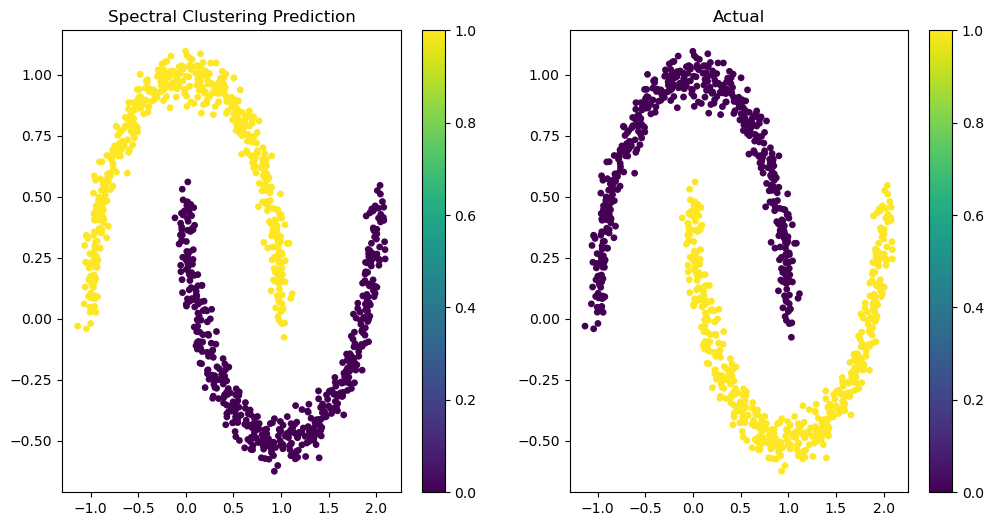

In [10]:
distance_matrix = get_distance_matrix_from_data(moon_data)
similarity_matrix = get_similarity_matrix_from_distance_matrix(
    distance_matrix, sim_graph_type="knn"
)

moon_spec, eigenvectors, eigenvalues = Spectral_Clustering(
    similarity_matrix, K=2, normalized=0, random_state=random_state
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=moon_data[:, 0], y=moon_data[:, 1], c=moon_spec.labels_, s=15)
plt.colorbar()
plt.title("Spectral Clustering Prediction")

plt.subplot(1, 2, 2)
plt.scatter(x=moon_data[:, 0], y=moon_data[:, 1], c=moon_labels, s=15)
plt.colorbar()
plt.title("Actual")

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



Text(0.5, 1.0, 'Actual')

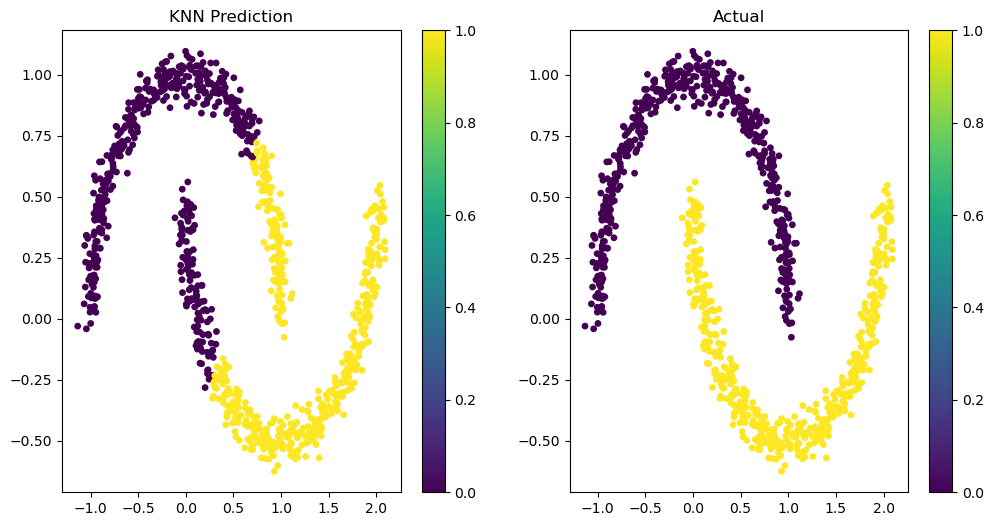

In [11]:
moons_kmeans = KMeans(n_clusters=2, random_state=random_state, n_init="auto").fit(
    moon_data
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=moon_data[:, 0], y=moon_data[:, 1], c=moons_kmeans.labels_, s=15)
plt.colorbar()
plt.title("KNN Prediction")

plt.subplot(1, 2, 2)
plt.scatter(x=moon_data[:, 0], y=moon_data[:, 1], c=moon_labels, s=15)
plt.colorbar()
plt.title("Actual")

# Blobs Dataset

In [12]:
# blobs_data, blobs_labels = make_blobs(n_samples=500, centers=3, cluster_std=0.8, random_state=random_state)

# # Apply a transformation to make the blobs anisotropic (elongated)
# transformation = [
#     [1.8, 1.5],
#     [1.5, 0.5]
#   ]
# blobs_data = np.dot(blobs_data, transformation)

blobs_data, blobs_labels = make_blobs(
    n_samples=[500, 50, 50],
    centers=[[0, 0], [5, 5], [5, -5]],
    cluster_std=[2.5, 0.3, 0.3],
    random_state=random_state,
)

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



Text(0.5, 1.0, 'Actual')

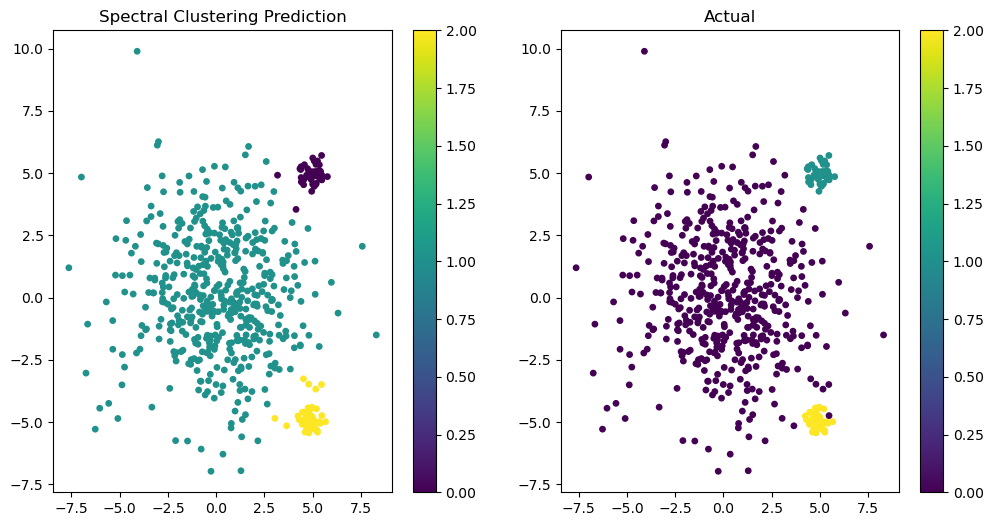

In [13]:
distance_matrix = get_distance_matrix_from_data(blobs_data)
similarity_matrix = get_similarity_matrix_from_distance_matrix(
    distance_matrix, sim_graph_type="knn"
)

blobs_spec, eigenvectors, eigenvalues = Spectral_Clustering(
    similarity_matrix, K=3, normalized=0, random_state=random_state
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=blobs_data[:, 0], y=blobs_data[:, 1], c=blobs_spec.labels_, s=15)
plt.colorbar()
plt.title("Spectral Clustering Prediction")

plt.subplot(1, 2, 2)
plt.scatter(x=blobs_data[:, 0], y=blobs_data[:, 1], c=blobs_labels, s=15)
plt.colorbar()
plt.title("Actual")

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



Text(0.5, 1.0, 'Actual')

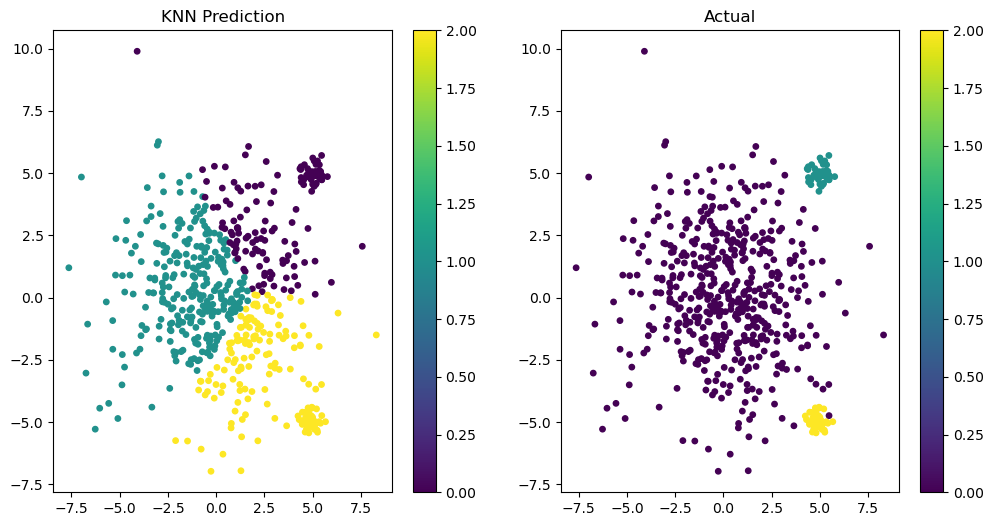

In [14]:
moons_kmeans = KMeans(n_clusters=3, random_state=random_state, n_init="auto").fit(
    blobs_data
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=blobs_data[:, 0], y=blobs_data[:, 1], c=moons_kmeans.labels_, s=15)
plt.colorbar()
plt.title("KNN Prediction")

plt.subplot(1, 2, 2)
plt.scatter(x=blobs_data[:, 0], y=blobs_data[:, 1], c=blobs_labels, s=15)
plt.colorbar()
plt.title("Actual")

# Concentric Rings Dataset

For this data set, both spectral clustering and kmeans seem to fail. Maybe, we could artificially construct such a similarity graph, such that the two circles are in different clusters

In [15]:
threshold = 0.2
circles_data, circles_labels = make_circles(
    n_samples=20, factor=threshold, random_state=random_state
)

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'Actual')

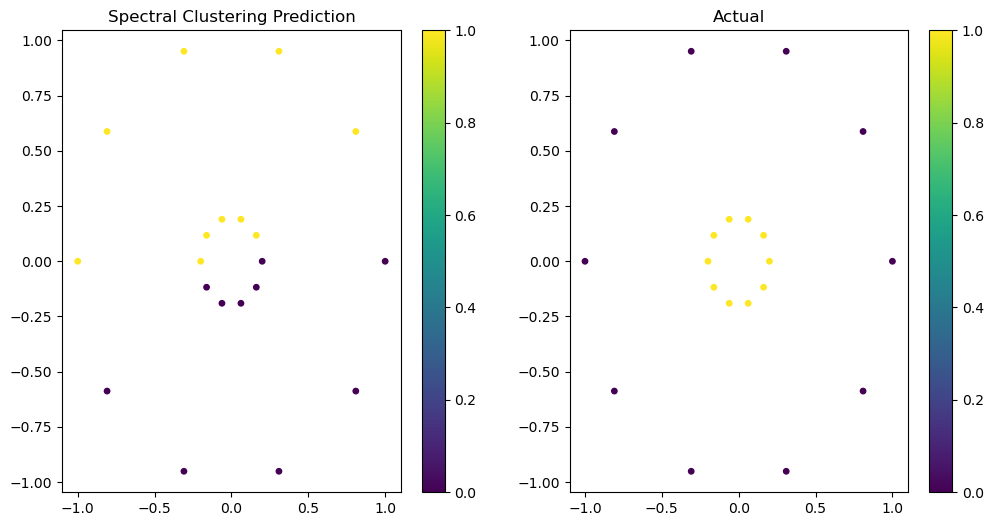

In [16]:
distance_matrix = get_distance_matrix_from_data(circles_data)
similarity_matrix = get_similarity_matrix_from_distance_matrix(
    distance_matrix, sim_graph_type="knn", sigma=20
)

circles_spec, eigenvectors, eigenvalues = Spectral_Clustering(
    similarity_matrix, K=2, normalized=2, random_state=random_state
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=circles_data[:, 0], y=circles_data[:, 1], c=circles_spec.labels_, s=15)
plt.colorbar()
plt.title("Spectral Clustering Prediction")

plt.subplot(1, 2, 2)
plt.scatter(x=circles_data[:, 0], y=circles_data[:, 1], c=circles_labels, s=15)
plt.colorbar()
plt.title("Actual")

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'Actual')

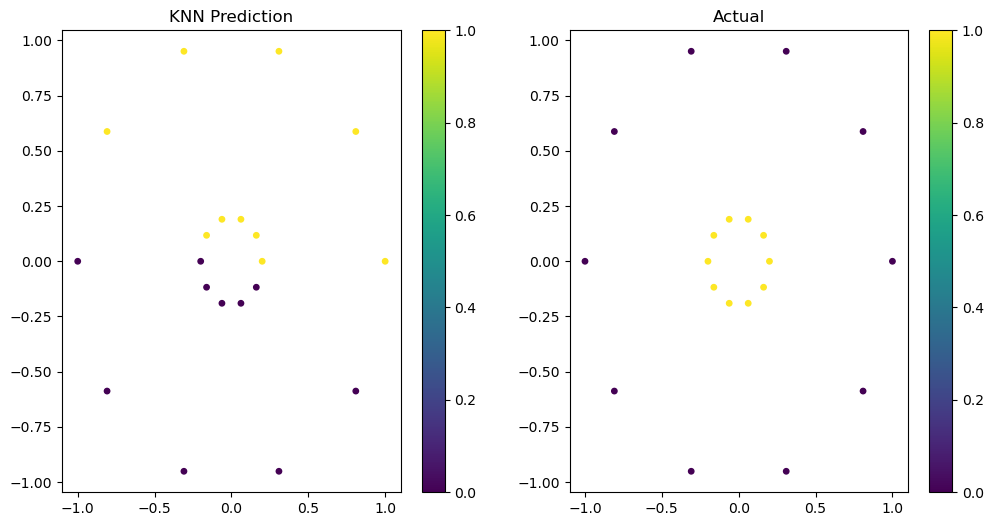

In [17]:
circles_kmeans = KMeans(n_clusters=2, random_state=random_state, n_init="auto").fit(
    circles_data
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=circles_data[:, 0], y=circles_data[:, 1], c=circles_kmeans.labels_, s=15)
plt.colorbar()
plt.title("KNN Prediction")

plt.subplot(1, 2, 2)
plt.scatter(x=circles_data[:, 0], y=circles_data[:, 1], c=circles_labels, s=15)
plt.colorbar()
plt.title("Actual")

So here I simply tried to force an adjacency matrix, such that points with the same radius are adjacent. Works pretty well. 

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'Actual')

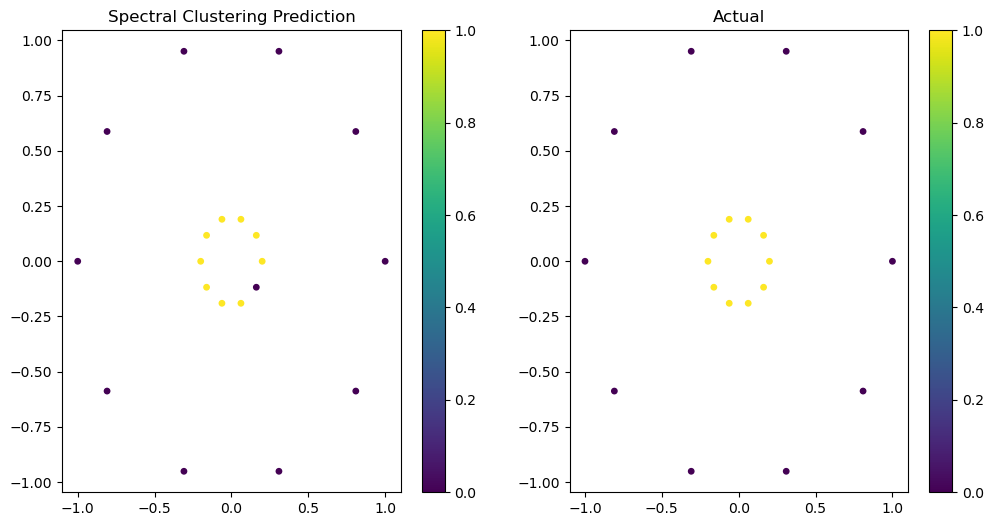

In [18]:
norms = np.linalg.norm(circles_data, axis=1)
is_inner_circle = norms <= threshold

adj_matrix = get_adjacency_matrix_from_labels(is_inner_circle)

# Switch from an adjacency to distance matrix
sim_matrix = get_similarity_matrix_from_distance_matrix(
    1 - adj_matrix, sim_graph_type="knn", knn=5
)

circles_spec, eigenvectors, eigenvalues = Spectral_Clustering(
    sim_matrix, K=2, normalized=0, random_state=1
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=circles_data[:, 0], y=circles_data[:, 1], c=circles_spec.labels_, s=15)
plt.colorbar()
plt.title("Spectral Clustering Prediction")

plt.subplot(1, 2, 2)
plt.scatter(x=circles_data[:, 0], y=circles_data[:, 1], c=circles_labels, s=15)
plt.colorbar()
plt.title("Actual")